In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling as yp
import sweetviz as sv
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

In [87]:
df = pd.read_csv('../Data/car_purchasing.csv', encoding = 'latin-1')

In [88]:
df.head()

customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248

In [89]:
df.tail()

customer name                     customer e-mail      country  gender  \
495        Walter                 ligula@Cumsociis.ca        Nepal       0   
496         Vanna  Cum.sociis.natoque@Sedmolestie.edu     Zimbabwe       1   
497         Pearl       penatibus.et@massanonante.com  Philippines       1   
498          Nell   Quisque.varius@arcuVivamussit.net     Botswana       1   
499         Marla           Camaron.marla@hotmail.com       marlal       1   

           age  annual Salary  credit card debt    net worth  \
495  41.462515    71942.40291       6995.902524  541670.1016   
496  37.642000    56039.49793      12301.456790  360419.0988   
497  53.943497    68888.77805      10611.606860  764531.3203   
498  59.160509    49811.99062      14013.034510  337826.6382   
499  46.731152    61370.67766       9391.341628  462946.4924   

     car purchase amount  
495          48901.44342  
496          31491.41457  
497          64147.28888  
498          45442.15353  
499          45107.22566

In [90]:
df.shape

(500, 9)

This dataset contain 500 rows and 9 coluumns.

In [91]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print(f"All features : {all_col}")
print(f"\nNumerica features : {num_col}")
print(f"\nCategorical features : {cat_col}")

All features : ['customer name', 'customer e-mail', 'country', 'gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

Numerica features : ['gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

Categorical features : ['customer name', 'country', 'customer e-mail']


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [93]:
yp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
my_report = sv.analyze(df)
my_report.show_html('Final_Report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Final_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [94]:
df.duplicated().sum()

0

This dataset doesn't contain any duplicate value.

In [95]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

There are no null values in that dataset.

In [96]:
df.describe().T

count           mean            std      min  \
gender               500.0       0.506000       0.500465      0.0   
age                  500.0      46.241674       7.978862     20.0   
annual Salary        500.0   62127.239608   11703.378228  20000.0   
credit card debt     500.0    9607.645049    3489.187973    100.0   
net worth            500.0  431475.713625  173536.756340  20000.0   
car purchase amount  500.0   44209.799218   10773.178744   9000.0   

                               25%            50%            75%        max  
gender                    0.000000       1.000000       1.000000        1.0  
age                      40.949969      46.049901      51.612263       70.0  
annual Salary         54391.977195   62915.497035   70117.862005   100000.0  
credit card debt       7397.515792    9655.035568   11798.867487    20000.0  
net worth            299824.195900  426750.120650  557324.478725  1000000.0  
car purchase amount   37629.896040   43997.783390   51254.709517    80000.0

In [97]:
df.drop(columns = ['customer name', 'country', 'customer e-mail'], axis = 1, inplace = True)

In [98]:
df.shape

(500, 6)

Now it only contain 500 rows and 6 columns.

In [99]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print(f"All features : {all_col}")
print(f"\nNumerica features : {num_col}")
print(f"\nCategorical features : {cat_col}")

All features : ['gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

Numerica features : ['gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

Categorical features : []


In [100]:
X = df.drop(columns = ['car purchase amount'], axis = 1)
y = df['car purchase amount']

In [101]:
X.head()

gender        age  annual Salary  credit card debt    net worth
0       0  41.851720    62812.09301      11609.380910  238961.2505
1       0  40.870623    66646.89292       9572.957136  530973.9078
2       1  43.152897    53798.55112      11160.355060  638467.1773
3       1  58.271369    79370.03798      14426.164850  548599.0524
4       1  57.313749    59729.15130       5358.712177  560304.0671

In [102]:
y.head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: car purchase amount, dtype: float64

In [103]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 0.8, random_state = 1, shuffle = True)

In [104]:
print(f"X_train has : {X_train.shape}")
print(f"y_train has : {y_train.shape}")
print('\n')
print(f"X_test has : {X_test.shape}")
print(f"y_test has : {y_test.shape}")

X_train has : (400, 5)
y_train has : (400,)


X_test has : (100, 5)
y_test has : (100,)


In [105]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [106]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [107]:
X_train_sc = pd.DataFrame(data = X_train_sc, columns = X_train.columns)
X_test_sc = pd.DataFrame(data = X_test_sc, columns = X_test.columns)

In [137]:
print(f"X_train_sc has : {X_train_sc.shape}")
print(f"y_train has : {y_train.shape}")
print('\n')
print(f"X_test_sc has : {X_test_sc.shape}")
print(f"y_test has : {y_test.shape}")

X_train_sc has : (400, 5)
y_train has : (400,)


X_test_sc has : (100, 5)
y_test has : (100,)


In [108]:
mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler()

In [109]:
X_train_mm = mm.transform(X_train)
X_test_mm = mm.transform(X_test)

In [110]:
X_train_mm = pd.DataFrame(data = X_train_mm, columns = X_train.columns)
X_test_mm = pd.DataFrame(data = X_test_mm, columns = X_test.columns)

In [139]:
print(f"X_train_mm has : {X_train_mm.shape}")
print(f"y_train has : {y_train.shape}")
print('\n')
print(f"X_test_mm has : {X_test_mm.shape}")
print(f"y_test has : {y_test.shape}")

X_train_mm has : (400, 5)
y_train has : (400,)


X_test_mm has : (100, 5)
y_test has : (100,)


In [130]:
def model_evaluation(estimator, X_train, y_train, X_test, y_test):
    print(estimator)
    print('\n')
    
    model = estimator
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f"For Train data : ")
    print(f"\tMAE : {mean_absolute_error(y_train, y_train_pred)}")
    print(f"\tMSE : {mean_squared_error(y_train, y_train_pred)}")
    print(f"\tSMSE : {np.sqrt(mean_squared_error(y_train, y_train_pred))}")
    print(f"\tR2 score : {r2_score(y_train, y_train_pred)}")
    print("\n")
    
    print(f"For Test data : ")
    print(f"\tMAE : {mean_absolute_error(y_test, y_test_pred)}")
    print(f"\tMSE : {mean_squared_error(y_test, y_test_pred)}")
    print(f"\tSMSE : {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
    print(f"\tR2 score : {r2_score(y_test, y_test_pred)}")
    print("\n")
    
    sns.set()
    plt.figure(figsize = (5, 5))
    plt.scatter(y_test, y_test_pred)
    plt.xlabel("y_test")
    plt.ylabel("y_test_prediction")
    plt.title("y_test vs y_test_pred")
    plt.show()
    
    print('\n')
    
    residuals = (y_test - y_test_pred)
    sns.set()
    plt.figure(figsize = (5, 5))
    sns.displot(residuals, kind = 'kde')
    plt.title("Residuals plot")
    plt.show()
    
    print("\n")
    
    sns.set()
    plt.figure(figsize = (5, 5))
    plt.scatter(y_test_pred, residuals)
    plt.xlabel("y_test_pred")
    plt.ylabel("residuals")
    plt.show()

# ML Model

## With StandardScaler

LinearRegression()


For Train data : 
	MAE : 1.1125207355630937
	MSE : 1.96321857584555
	SMSE : 1.4011490198567567
	R2 score : 0.9999999827528034


For Test data : 
	MAE : 1.4243833713345522
	MSE : 3.0641746490169157
	SMSE : 1.750478405755671
	R2 score : 0.9999999752373189




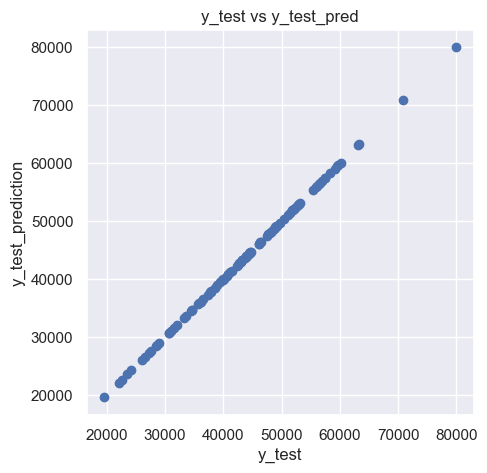

<Figure size 500x500 with 0 Axes>

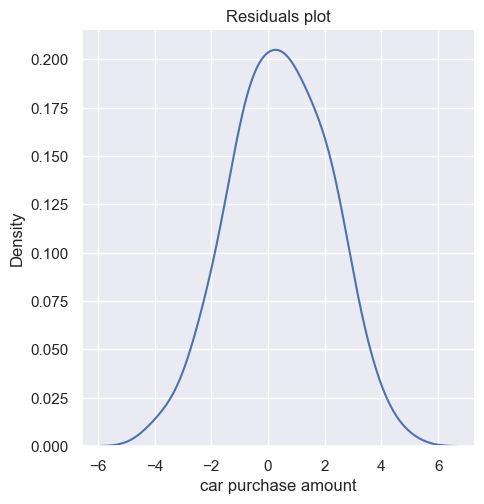

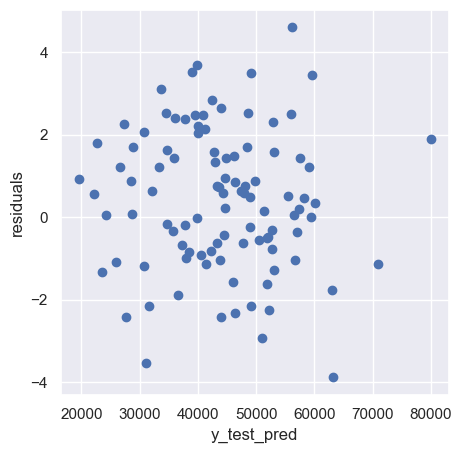

Ridge()


For Train data : 
	MAE : 20.27668942087769
	MSE : 667.5831500289487
	SMSE : 25.83763050337528
	R2 score : 0.9999941351727604


For Test data : 
	MAE : 21.109433608801627
	MSE : 714.9128702678486
	SMSE : 26.73785463098804
	R2 score : 0.9999942225357757




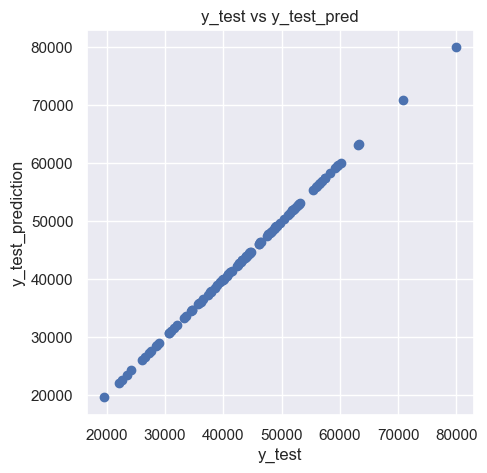

<Figure size 500x500 with 0 Axes>

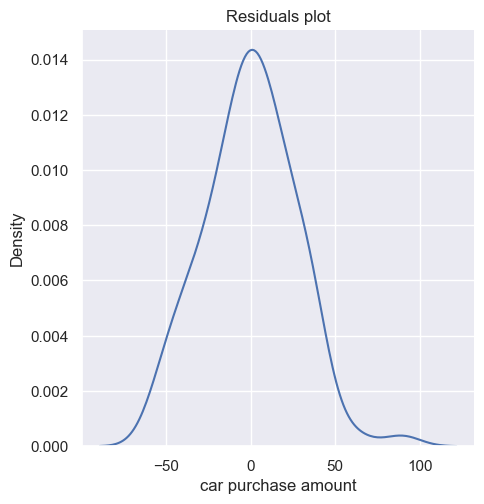

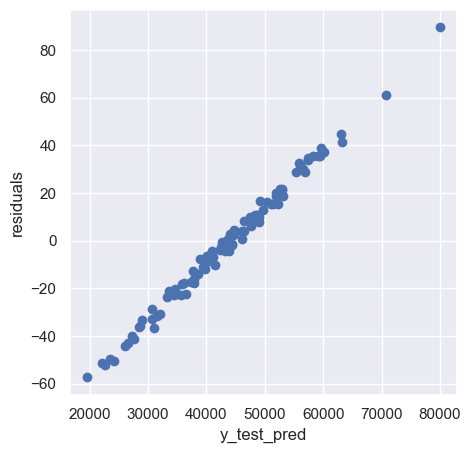

Lasso()


For Train data : 
	MAE : 1.7323530606474469
	MSE : 4.868917333395465
	SMSE : 2.206562333902096
	R2 score : 0.9999999572257643


For Test data : 
	MAE : 1.9446622517630021
	MSE : 5.967378445085208
	SMSE : 2.4428218201672443
	R2 score : 0.9999999517755003




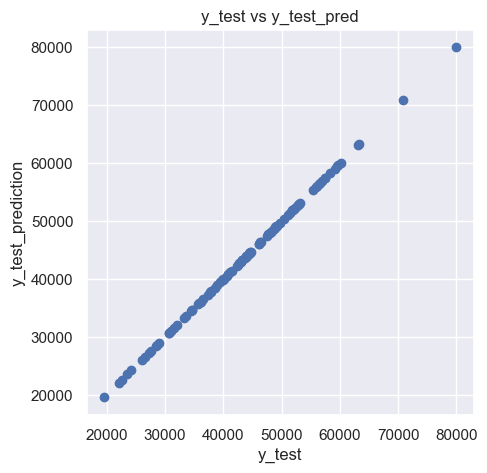

<Figure size 500x500 with 0 Axes>

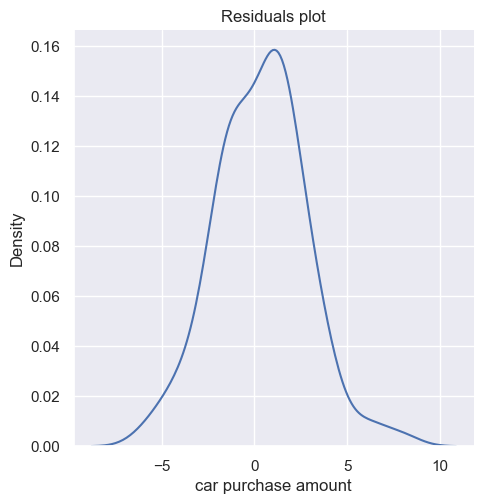

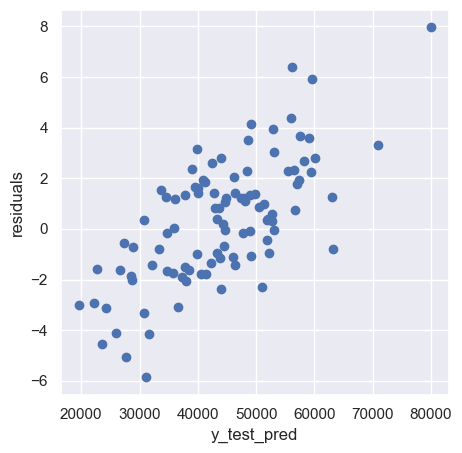

KNeighborsRegressor()


For Train data : 
	MAE : 1965.0834699
	MSE : 6832786.339736242
	SMSE : 2613.9598963519393
	R2 score : 0.9399728536501176


For Test data : 
	MAE : 2652.363284420001
	MSE : 14047434.13906035
	SMSE : 3747.9906802259193
	R2 score : 0.8864777072058481




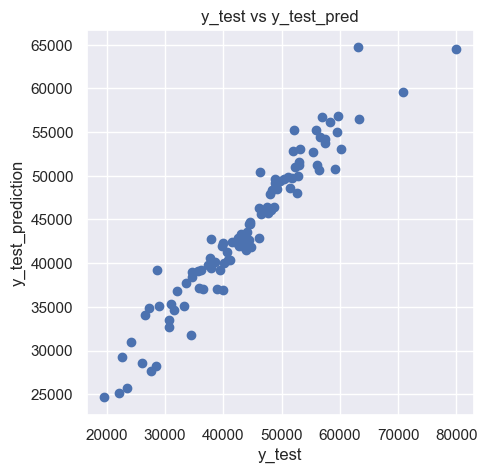

<Figure size 500x500 with 0 Axes>

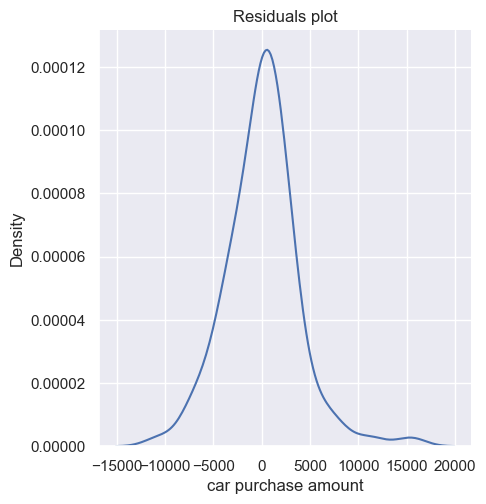

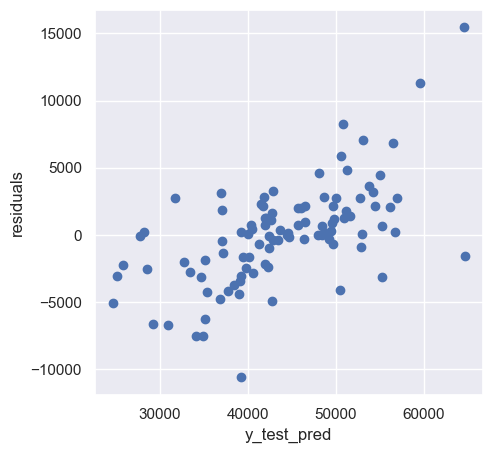

DecisionTreeRegressor()


For Train data : 
	MAE : 0.0
	MSE : 0.0
	SMSE : 0.0
	R2 score : 1.0


For Test data : 
	MAE : 3294.2343718
	MSE : 19904842.25667158
	SMSE : 4461.484310929669
	R2 score : 0.8391419167148748




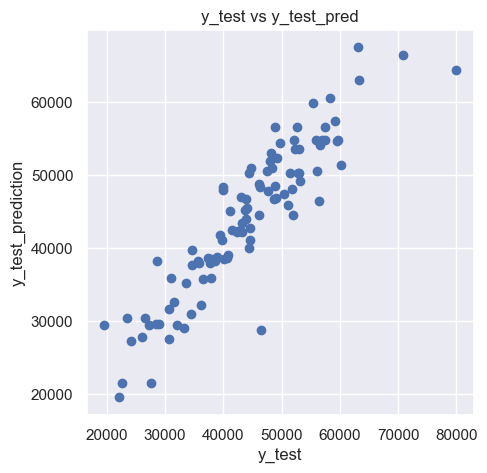

<Figure size 500x500 with 0 Axes>

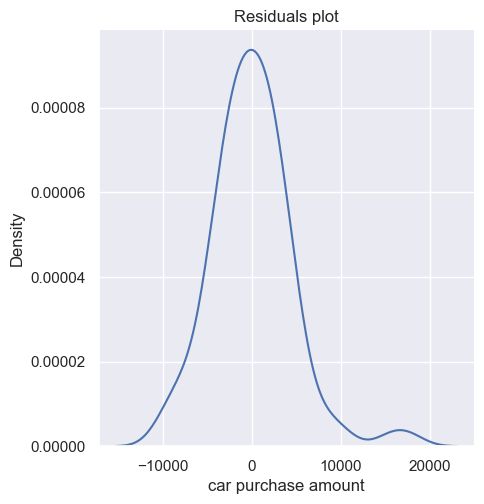

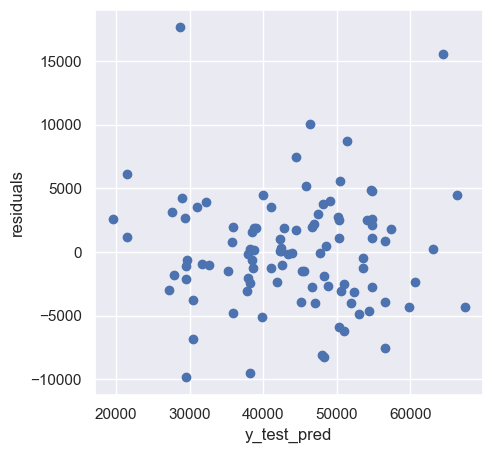

In [132]:
models = {
    'Lr' : LinearRegression(),
    'ridge' : Ridge(),
    'lasso' : Lasso(),
    'knr' : KNeighborsRegressor(),
    'dtr' : DecisionTreeRegressor()
}

for i in list(models.values()):
    model_evaluation(i, X_train_sc, y_train, X_test_sc, y_test)

## With MinMaxScaler

LinearRegression()


For Train data : 
	MAE : 1.1125207355632665
	MSE : 1.9632185758447422
	SMSE : 1.4011490198564684
	R2 score : 0.9999999827528034


For Test data : 
	MAE : 1.42438337133397
	MSE : 3.064174649012072
	SMSE : 1.7504784057542875
	R2 score : 0.9999999752373189




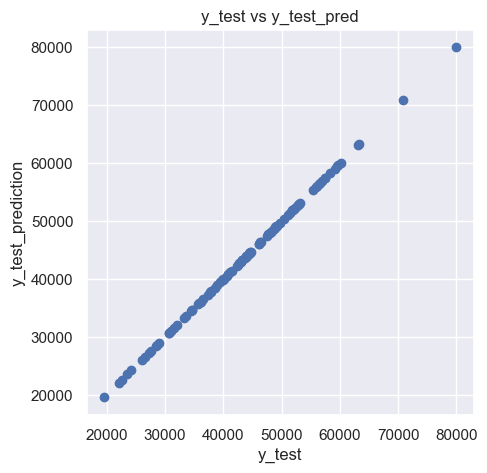

<Figure size 500x500 with 0 Axes>

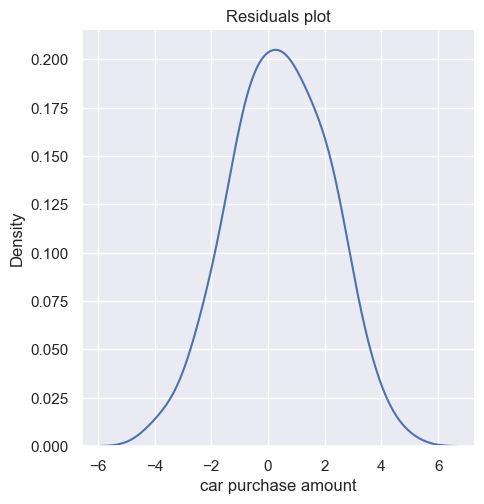

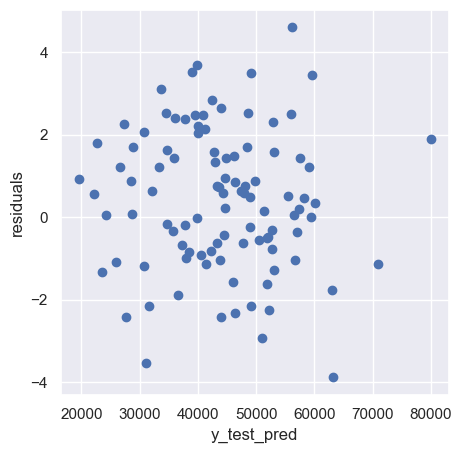

Ridge()


For Train data : 
	MAE : 726.3571018110815
	MSE : 880603.2239570015
	SMSE : 938.4046163340212
	R2 score : 0.9922637565449346


For Test data : 
	MAE : 772.1983837040523
	MSE : 964396.394496632
	SMSE : 982.0368600498823
	R2 score : 0.9922063710153836




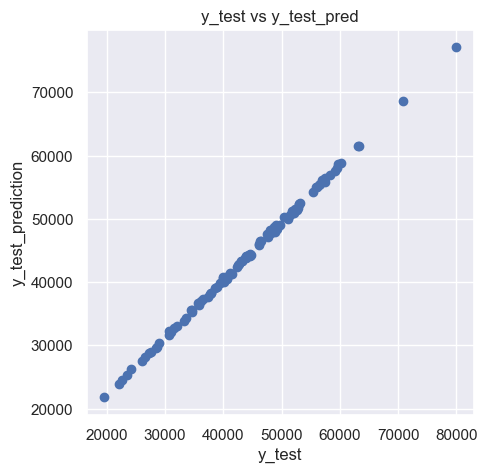

<Figure size 500x500 with 0 Axes>

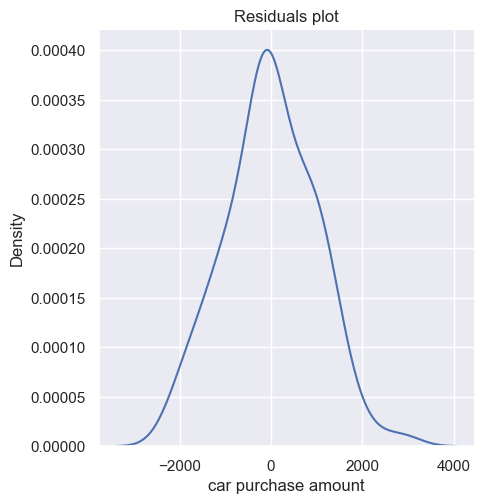

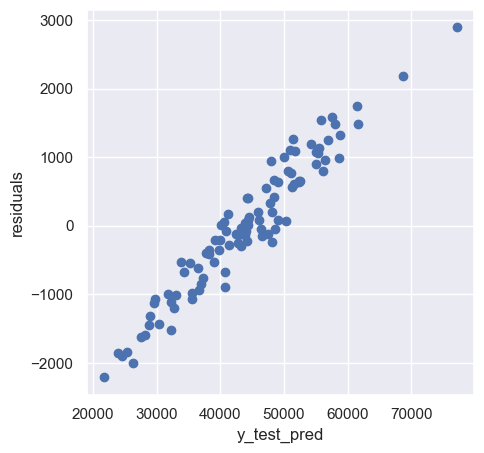

Lasso()


For Train data : 
	MAE : 8.234217968963721
	MSE : 110.35434634028675
	SMSE : 10.50496769820292
	R2 score : 0.9999990305190052


For Test data : 
	MAE : 8.488764450213676
	MSE : 120.75834647349856
	SMSE : 10.989010259049655
	R2 score : 0.9999990241090131




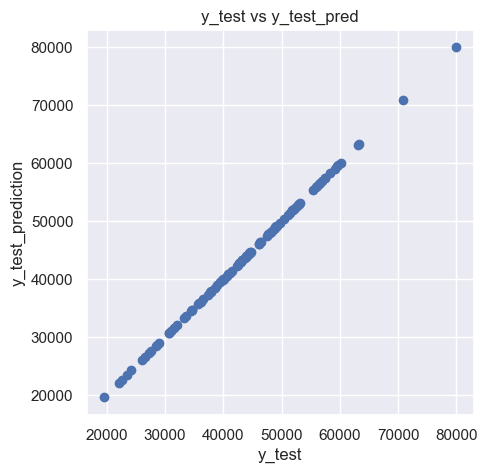

<Figure size 500x500 with 0 Axes>

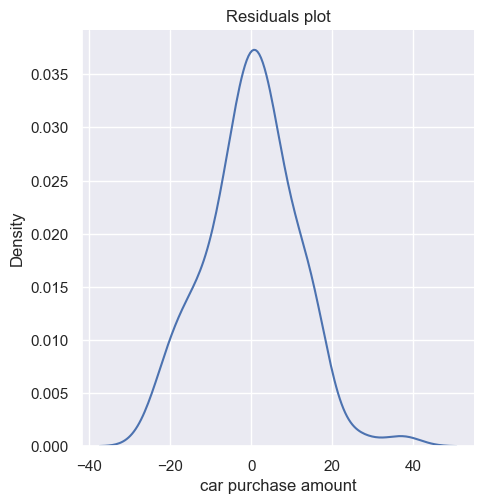

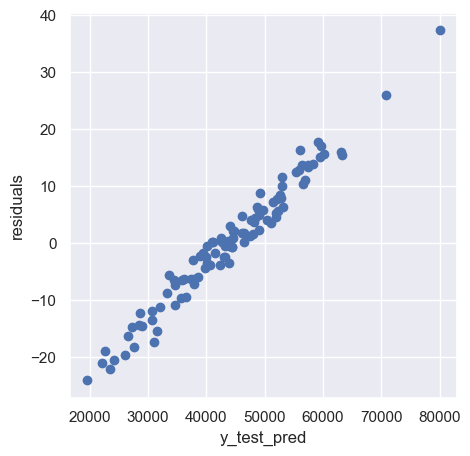

KNeighborsRegressor()


For Train data : 
	MAE : 2130.7274336749997
	MSE : 8024050.6133988
	SMSE : 2832.675522081341
	R2 score : 0.9295074020259873


For Test data : 
	MAE : 3008.54290256
	MSE : 16736177.437838905
	SMSE : 4090.9873426642257
	R2 score : 0.8647490198889576




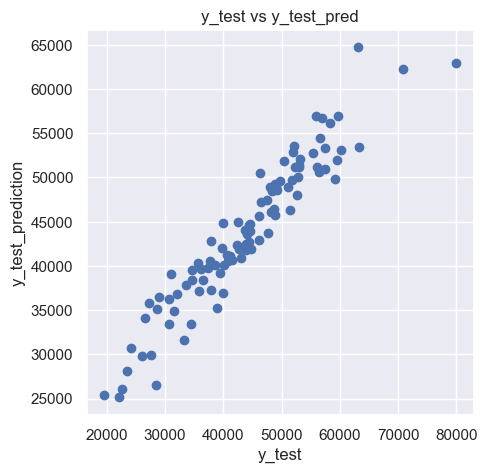

<Figure size 500x500 with 0 Axes>

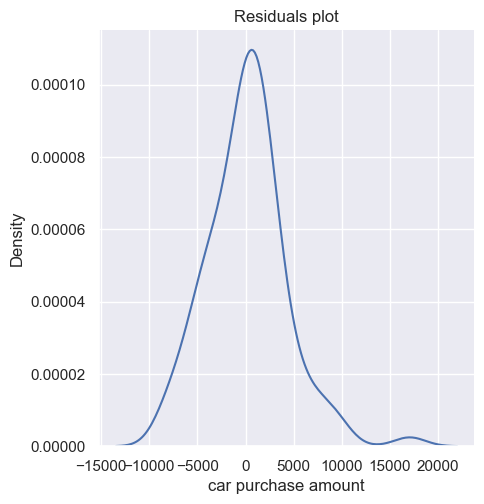

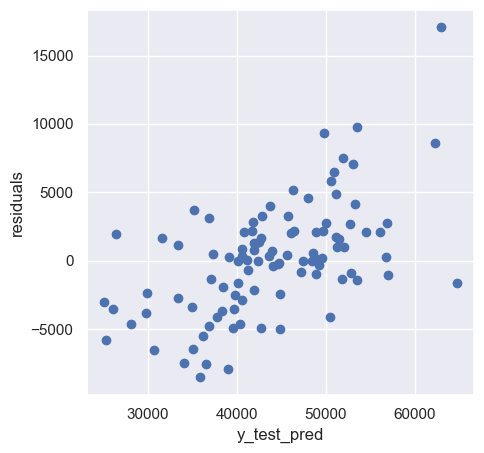

DecisionTreeRegressor()


For Train data : 
	MAE : 0.0
	MSE : 0.0
	SMSE : 0.0
	R2 score : 1.0


For Test data : 
	MAE : 3410.2319379000005
	MSE : 20221772.323103234
	SMSE : 4496.862497686941
	R2 score : 0.8365806925482008




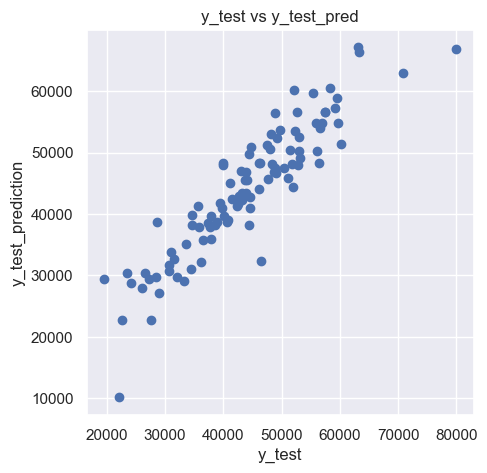

<Figure size 500x500 with 0 Axes>

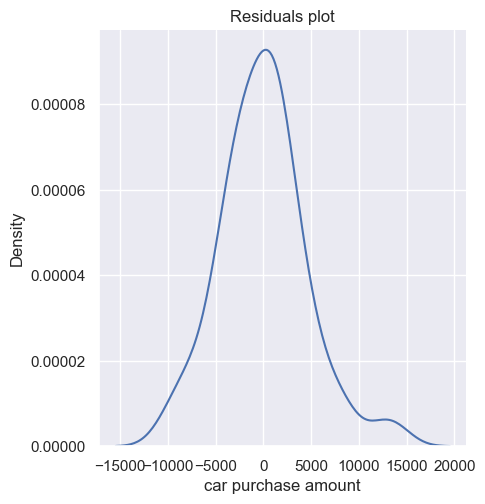

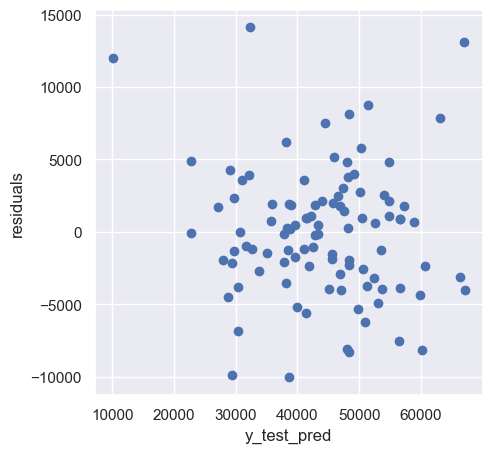

In [133]:
for i in list(models.values()):
    model_evaluation(i, X_train_mm, y_train, X_test_mm, y_test)

Based on above results we can say that LinearRegression gives the best score with StandardScaler. Hence we will use that.

# DL Model

In [134]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [143]:
model = Sequential()
model.add(Dense(10, activation = 'relu', input_dim = 5))
model.add(Dense(10, activation= 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                60        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
